# Tyrosinase Project Notebook 3

---

In this notebook :

Calculating PaDEL descriptors and building a Machine Learning prediction model.

---


## Installing PaDEL descriptors

In [1]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2022-06-22 09:44:31--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2022-06-22 09:44:31--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2022-06-22 09:44:31 (200 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2022-06-22 09:44:31--  https://github

In [2]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

## Loading Libraries and Data

In [3]:
import pandas as pd
import numpy as np

In [4]:
df1 = pd.read_csv("tyrosinase_2.csv")

In [7]:
df1

,Unnamed: 0,Unnamed: 0.1,molecule_chembl_id,canonical_smiles,bio_class,Mol_Wt,LogP,H_Donors,H_acceptors,pIC50
0,0,0,CHEMBL207313,O=C(NCc1ccccc1)c1ccccc1,inactive,211.264,2.6166,1,1,2.701147
1,1,1,CHEMBL287556,O=c1cc(CO)occ1O,inactive,142.110,-0.1623,2,4,4.787812
2,2,3,CHEMBL205299,O=C(NCc1ccc(O)cc1O)c1ccc(O)cc1O,inactive,275.260,1.4390,5,5,4.537602
3,3,4,CHEMBL205382,O=C(NCc1cc(O)c(O)c(O)c1)c1ccc(O)cc1O,inactive,291.259,1.1446,6,6,3.259637
4,4,5,CHEMBL204473,O=C(NCc1ccc(O)cc1)c1ccc(O)cc1O,inactive,259.261,1.7334,4,4,2.739929
...,...,...,...,...,...,...,...,...,...,...
1238,1512,1535,CHEMBL4575873,CC(=O)N/C(=C\c1ccc(O)cc1)C(=O)O,inactive,221.212,0.9538,3,3,4.187087
1239,1513,1536,CHEMBL3806298,CC(C)CCCCCCC(=O)N/C(=C\c1ccc(O)cc1)C(=O)O,inactive,333.428,3.9305,3,3,3.327902
1240,1514,1537,CHEMBL4556405,O=C(O)/C(=C/c1ccc(O)cc1)NC(=O)c1ccccc1,inactive,283.283,2.2477,3,3,3.744727
1241,1515,1538,CHEMBL3805142,CCCCCCCCC(=O)N/C(=C\c1ccc(O)cc1)C(=O)O,inactive,319.401,3.6845,3,3,3.602060


In [8]:
selection = ['canonical_smiles','molecule_chembl_id']
df2 = df1[selection]
df2.to_csv("mol.smi" , sep ="\t" , index = False, header = False)

In [9]:
!cat mol.smi | wc -l

1243


## Creating PaDEL descriptors

Creating X and Y variables for prediction model from descriptors data.

In [10]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash padel.sh

In [12]:
df_des = pd.read_csv("descriptors_output.csv")

In [13]:
df_des

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL287556,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL207313,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL205299,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL205382,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL204473,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,CHEMBL18688,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1239,CHEMBL3806298,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1240,CHEMBL4556405,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1241,CHEMBL3805142,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
dfx = df_des.drop(columns = "Name")

In [16]:
dfx

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1239,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1240,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1241,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [17]:
dfy = df1["pIC50"]
dfy

0       2.701147
1       4.787812
2       4.537602
3       3.259637
4       2.739929
          ...   
1238    4.187087
1239    3.327902
1240    3.744727
1241    3.602060
1242    3.886057
Name: pIC50, Length: 1243, dtype: float64

# Model Building 

Regression model using Random Forest.

## Importing Libraries and preparing data

In [18]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [19]:
X = dfx
Y = dfy

In [20]:
X.shape

(1243, 881)

In [21]:
Y.shape

(1243,)

In [22]:
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1239,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1240,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1241,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [23]:
Y

0       2.701147
1       4.787812
2       4.537602
3       3.259637
4       2.739929
          ...   
1238    4.187087
1239    3.327902
1240    3.744727
1241    3.602060
1242    3.886057
Name: pIC50, Length: 1243, dtype: float64

### Removing low variance data

Low variance data does not reflect well in the model and affects predictions.

Using a threshold of 0.01 would mean dropping the column where 99% of the values are similar.

In [24]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=0.01)    
X = selection.fit_transform(X)

In [25]:
X.shape

(1243, 394)

### Splitting training and testing data

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [27]:
X_train.shape

(994, 394)

In [28]:
X_test.shape

(249, 394)

In [29]:
Y_train.shape

(994,)

In [31]:
Y_test.shape

(249,)

## ML Model

In [32]:
model = RandomForestRegressor(n_estimators = 100, random_state = 1)




In [33]:
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=1)

In [34]:
r2 = model.score(X_test, Y_test)

In [35]:
r2

0.5668894992955873

In [36]:
Y_pred = model.predict(X_test)

### Model Data Visualisation

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

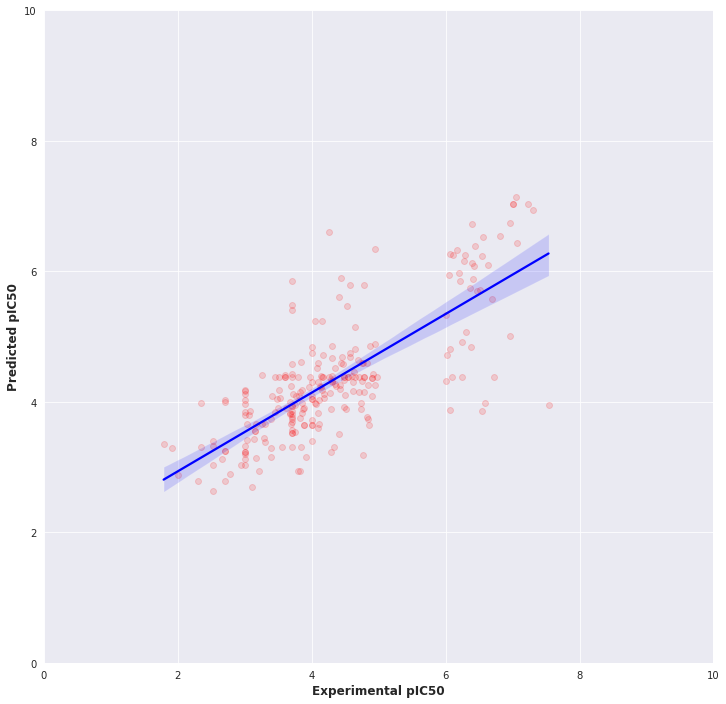

In [48]:
sns.color_palette("bright")
sns.set_style("darkgrid")

plot = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.15 , 'color': "red"}, line_kws={'color': 'blue'})
plot.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
plot.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
plot.set_xlim(0, 10)
plot.set_ylim(0, 10)
plot.figure.set_size_inches(12, 12)

plt.savefig("pred_model_pic50.jpeg")

plt.show


In [49]:
df_preds = pd.DataFrame()
y_ser = list(Y_pred)
yt = list(Y_test)
df_preds["Experimental_pIC50"] = yt
df_preds["Predcited_pIC50"] = y_ser
df_preds

,Experimental_pIC50,Predcited_pIC50
0,3.698970,3.529030
1,4.158641,5.239212
2,4.522879,5.464177
3,3.207608,2.946714
4,3.515700,4.385344
...,...,...
244,4.440333,4.592917
245,6.397940,6.720470
246,3.862361,4.177251
247,3.680894,3.827234


In [50]:
df_preds.to_csv("final_preds.csv")